# **DSA4263 E-Commerce Fraud Analysis**


## **Data Preprocessing**

In [100]:
import pandas as pd
import numpy as np
import os

In [101]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [102]:
# reading the customer.csv
customer = pd.read_csv('gdrive/MyDrive/customer.csv', index_col=0)
print(customer.columns)

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud'],
      dtype='object')


In [103]:
# reading the transactions.csv
transactions = pd.read_csv('gdrive/MyDrive/transactions.csv', index_col=0)
print(transactions.columns)

Index(['customerEmail', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'transactionAmount', 'transactionFailed',
       'orderState'],
      dtype='object')


In [104]:
customer.shape, transactions.shape

((168, 9), (623, 10))

In [105]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerEmail           168 non-null    object
 1   customerPhone           168 non-null    object
 2   customerDevice          168 non-null    object
 3   customerIPAddress       168 non-null    object
 4   customerBillingAddress  168 non-null    object
 5   No_Transactions         168 non-null    int64 
 6   No_Orders               168 non-null    int64 
 7   No_Payments             168 non-null    int64 
 8   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 12.0+ KB


In [106]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customerEmail                     623 non-null    object
 1   transactionId                     623 non-null    object
 2   orderId                           623 non-null    object
 3   paymentMethodId                   623 non-null    object
 4   paymentMethodRegistrationFailure  623 non-null    int64 
 5   paymentMethodType                 623 non-null    object
 6   paymentMethodProvider             623 non-null    object
 7   transactionAmount                 623 non-null    int64 
 8   transactionFailed                 623 non-null    int64 
 9   orderState                        623 non-null    object
dtypes: int64(3), object(7)
memory usage: 53.5+ KB


In [107]:
# Checking for null values in customer.csv
customer.isna().sum()

customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64

In [108]:
# Checking for duplicated entries in customer.csv
customer.duplicated().sum()

0

In [109]:
# Checking for null values in transactions.csv
transactions.isna().sum()

customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

In [110]:
# Checking for duplicated entries in transactions.csv
transactions.duplicated().sum()

0

### Checking for Class Balance

In [111]:
from matplotlib import pyplot as plt

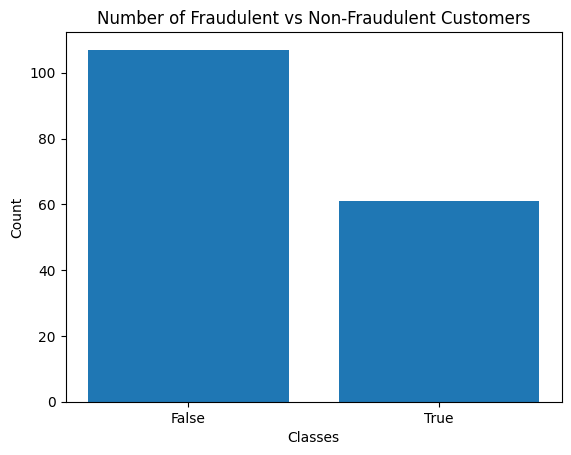

In [112]:
class_count = customer['Fraud'].value_counts()
plt.bar(class_count.index.astype(str), class_count.values)
plt.title("Number of Fraudulent vs Non-Fraudulent Customers")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

Class imbalance exists in the dataset. Since the negative class is way significant compared to the positive class, undersampling would discard too much data. Oversampling techniques are also not applicable due to string type objects in the dataset comprising of majority of the data. As such, we look into algorithms and metrics that are unaffected by class imbalance instead.

# **EDA**

### Analysing Fraudulent Customers based on Email

In [154]:
# Getting the Domain Provider and Top Level Domain(TLD) from the email address of customers
customer['domainProvider'] = customer['customerEmail'].str.split('@').str[1].str.split('.').str[0]
customer['tld'] = customer['customerEmail'].str.split('@').str[1].str.split('.').str[1]
customer.fillna('none', inplace=True)
customer

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,domainProvider,tld
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,yahoo,com
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,yahoo,com
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,yahoo,com
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,yahoo,com
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,malone,com
...,...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,brewer-jones,com
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,hughes,biz
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True,gmail,com
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,jackson-sanders,com


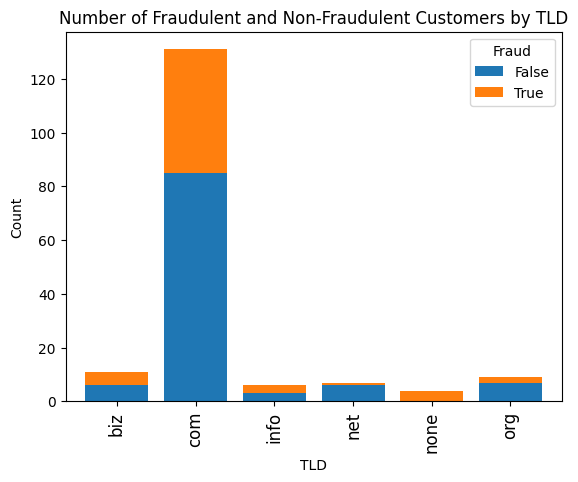

In [157]:
fraud_counts = customer.groupby(['tld', 'Fraud']).size().unstack(fill_value=0)

fraud_counts.plot(kind='bar', stacked=True, width=0.8)
plt.xlabel('TLD')
plt.ylabel('Count')
plt.title('Number of Fraudulent and Non-Fraudulent Customers by TLD')
plt.xticks(rotation=90, fontsize=12)
plt.show()

Insights: All customers without TLDs are fraudulent. Majority of customers that use .info emails are also fraudulent.

### Joining dataframes

In [114]:
# Joining both dataframes
df = pd.merge(transactions, customer, on='customerEmail', how='left')

In [115]:
df.head(5)

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,domainProvider,tld
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,yahoo,com
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,yahoo,com
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,yahoo,com
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,yahoo,com
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,yahoo,com


In [116]:
df.shape

(819, 20)

In [117]:
df.columns

Index(['customerEmail', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'transactionAmount', 'transactionFailed',
       'orderState', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud', 'domainProvider', 'tld'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customerEmail                     819 non-null    object
 1   transactionId                     819 non-null    object
 2   orderId                           819 non-null    object
 3   paymentMethodId                   819 non-null    object
 4   paymentMethodRegistrationFailure  819 non-null    int64 
 5   paymentMethodType                 819 non-null    object
 6   paymentMethodProvider             819 non-null    object
 7   transactionAmount                 819 non-null    int64 
 8   transactionFailed                 819 non-null    int64 
 9   orderState                        819 non-null    object
 10  customerPhone                     819 non-null    object
 11  customerDevice                    819 non-null    object
 12  customerIPAddress     

In [119]:
# Checking for null values in df
df.isna().sum()

customerEmail                        0
transactionId                        0
orderId                              0
paymentMethodId                      0
paymentMethodRegistrationFailure     0
paymentMethodType                    0
paymentMethodProvider                0
transactionAmount                    0
transactionFailed                    0
orderState                           0
customerPhone                        0
customerDevice                       0
customerIPAddress                    0
customerBillingAddress               0
No_Transactions                      0
No_Orders                            0
No_Payments                          0
Fraud                                0
domainProvider                       0
tld                                 18
dtype: int64

In [120]:
# Checking for duplicated entries in df
df.duplicated().sum()

0

In [121]:
df.head()

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,domainProvider,tld
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,yahoo,com
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,yahoo,com
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,yahoo,com
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,yahoo,com
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,yahoo,com


In [122]:
df['Fraud'].value_counts()

True     453
False    366
Name: Fraud, dtype: int64